* overall impact of events
* predicting long-term outcomes
* measuring certainty

In [44]:
import numpy as np
import pandas as pd
from fractions import Fraction
import math

def num_to_frac(i):
    return Fraction(i).limit_denominator()

In [20]:
liklihood_per_image = dict(
    Dollar = 0.1,
    Cherry = 0.2,
    Lemon = 0.2,
    Other = 0.5
)

# events are independent, so

probability_of_3_dollars = liklihood_per_image['Dollar'] ** 3
probability_of_2_dollar_and_cherry = liklihood_per_image['Dollar'] ** 2 * liklihood_per_image['Cherry']
probability_of_2_dollar_and_cherry = probability_of_2_dollar_and_cherry * 3
probability_of_3_lemons = liklihood_per_image['Lemon'] ** 3
probability_of_3_cherrys = liklihood_per_image['Cherry'] ** 3

probability_of_winning_something = probability_of_3_dollars + probability_of_2_dollar_and_cherry + probability_of_3_lemons + probability_of_3_cherrys
probability_of_winnning_nothing = 1 - probability_of_winning_something


print(f'Probability of 💲💲💲 = {probability_of_3_dollars}')
print(f'Probability of 💲💲🍒 = {probability_of_2_dollar_and_cherry}')
print(f'Probability of 🍋🍋🍋 = {probability_of_3_lemons}')
print(f'Probability of 🍒🍒🍒 = {probability_of_3_cherrys}')
print(f'Probability of Winning Nothing = {probability_of_winnning_nothing}')

Probability of 💲💲💲 = 0.0010000000000000002
Probability of 💲💲🍒 = 0.006000000000000002
Probability of 🍋🍋🍋 = 0.008000000000000002
Probability of 🍒🍒🍒 = 0.008000000000000002
Probability of Winning Nothing = 0.977


# Probability Distribution

In [19]:
slots_probability_dist = pd.DataFrame(
    data = dict(
        Combination = ['None', 'Lemons', 'Cherries', 'Dollars/Cherry', 'Dollars'],
        Probability = [
            probability_of_winnning_nothing,
            probability_of_3_lemons,
            probability_of_3_cherrys,
            probability_of_2_dollar_and_cherry,
            probability_of_3_dollars
        ]
    )
)
slots_probability_dist.set_index('Combination', inplace=True)
slots_probability_dist

,Probability
Combination,
None,0.977
Lemons,0.008
Cherries,0.008
Dollars/Cherry,0.006
Dollars,0.001


We don't just want to know the probability of winning, we want to know how _much_ we stand to win

In [38]:
cost_per_game = 1
dollar_win = 20
dollar_cherry_win = 15
cherry_win = 10
lemon_win = 5
nothing = 0

slots_probability_dist['Gains'] = [
    nothing - cost_per_game,
    lemon_win - cost_per_game,
    cherry_win - cost_per_game,
    dollar_cherry_win - cost_per_game,
    dollar_win - cost_per_game
]
slots_probability_dist

,Probability,Gains
Combination,,
None,0.977,-1
Lemons,0.008,4
Cherries,0.008,9
Dollars/Cherry,0.006,14
Dollars,0.001,19


* __random variable__ - a variable that can take on a set of values, where each value is associated with a specific probability

In the slots machine example, the random variable represents that amount we'll gain each game

| Combination     | None | Lemons | Cherries | dollar/cherry | Dollars | 
| --------------- | ---- | ------ | -------- | ------------- | ------- |
| $x$ | -1 | 4 | 9 | 14 | 19 |
| $P(X = x)$ | 0.997 | 0.008 | 0.008 | 0.006 | 0.001 |

* The value of each combination's winnings is represented by $x$
* $X$ is the variable
* The probability that $X = 9$ is like saying that the value of the winnings is \$9

The variable is __discrete__ meaning it can only take exact values

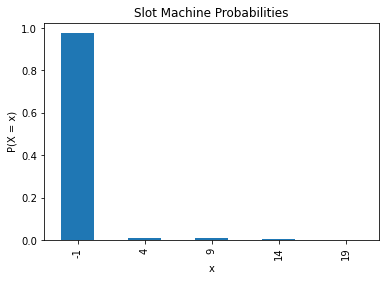

In [33]:
slots_probability_dist.set_index('Gains')['Probability'].plot(
    kind='bar',
    title='Slot Machine Probabilities',
    xlabel='x',
    ylabel='P(X = x)'
);

* The probability of losing \$1 is nearly 1
* The probabilities for winning \$4, \$9, \$14, and \$19 are so tiny, they barely register on the graph

# Expectation and Variance of Discrete Probability Distributions

## Expectation gives you a prediction of the results...

* The __expectation__ is how much you can typically expect to win or lose each game.
    * It's sort of like the mean for probability distributions
    * $E(X) = \mu$
    
### $$
E(X) = \sum{xP(X = x)}
$$

* $E(X)$ is the expectation of $X$
* Multiply each value by its probability
* Once you're done multiplying, add the whole lot up together

In [35]:
slots_expectation = (slots_probability_dist['Gains'] * slots_probability_dist['Probability']).sum()
print(f'E(X) = {slots_expectation}')

E(X) = -0.7699999999999999


In other words, you can expect to lose \$0.77 per game

If you played the slot machine 100 times, you could expect to lose \$77

## ... and Variance tells you about the spread of the results

Previously, we calculated variance with $Variance = \frac{\sum{(x - \mu)^2}}{n}$

For probability distributions, we use __expectation__ instead of __mean__ (or rather, we use the mean as it's understood for probability distributions)

### $$
Var(X) = E(X - \mu)^2
$$

How do you calculate $E(X - \mu)^2$ ?

### $$
E(X - \mu)^2 = \sum{(x - \mu)^2P(X = x)}
$$

In [45]:
slots_variance = ((slots_probability_dist['Gains'] - slots_expectation) ** 2 * slots_probability_dist['Probability']).sum()
print(f'Var(X) = {slots_variance}')

std_deviation = math.sqrt(slots_variance)
print(f'𝜎 = {std_deviation}')

Var(X) = 2.6971000000000003
𝜎 = 1.642284993537967


If the slot machine has a low expectation, I guess I would hope for a high variance, since that would mean that in the spread I would have a better possibility of getting higher than the expectation over time

In general, the smaller the variance is, the closer your average winnings per game are likely to be to the expectation. If you play a slot machine with a larger variance, your overall winnings will be less reliable

### Expectation and Variance
* __Expectation__ : $E(X) = \sum{xP(X = x)}$
* __Variance__ : $Var(X) = E(X - \mu)^2$

E(X) = 2.95
Var(X) = 1.2475


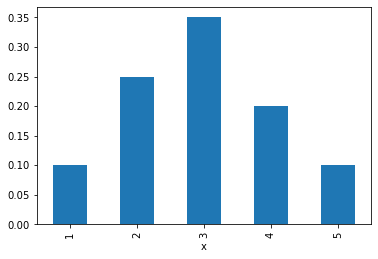

In [64]:
prob_dist = pd.DataFrame(data={
    'x': [1, 2, 3, 4, 5],
    'P(X = x)': [0.1, 0.25, 0.35, 0.2, 0.1]
})
prob_dist.set_index('x', inplace=True)

e_x = (prob_dist.index * prob_dist['P(X = x)']).sum()
print(f'E(X) = {e_x}')

var_x = ((prob_dist.index - e_x) ** 2 * prob_dist['P(X = x)']).sum()
print(f'Var(X) = {var_x}')

prob_dist['P(X = x)'].plot(kind='bar');

In [67]:
def new_value(x):
    return x * 2 - 10

print(new_value(e_x))

-4.1


If all of the values are doubled minus 10, you can just perform that calculation on the expectation to get the new expectation

In [71]:
# Cost has doubled, but winnings are 5 times more
slots_probability_dist_2 = slots_probability_dist.copy()
slots_probability_dist_2['Gains'] = [
    (nothing * 5) - (cost_per_game * 2),
    (lemon_win * 5) - (cost_per_game * 2),
    (cherry_win * 5) - (cost_per_game * 2),
    (dollar_cherry_win * 5) - (cost_per_game * 2),
    (dollar_win * 5) - (cost_per_game * 2)
]
slots_probability_dist_2.columns = ['P(Y = y)', 'y']
slots_probability_dist_2.set_index('y', inplace=True)
slots_probability_dist_2

,P(Y = y)
y,
-2,0.977
23,0.008
48,0.008
73,0.006
98,0.001


In [74]:
e_y = (slots_probability_dist_2.index * slots_probability_dist_2['P(Y = y)']).sum()
print(f'E(X) = {slots_expectation}')
print(f'E(Y) = {e_y}')

var_y = ((slots_probability_dist_2.index - e_y) ** 2 * slots_probability_dist_2['P(Y = y)']).sum()
print(f'Var(X) = {slots_variance}')
print(f'Var(Y) = {var_y}')

E(X) = -0.7699999999999999
E(Y) = -0.8499999999999998
Var(X) = 2.6971000000000003
Var(Y) = 67.42750000000001


With these new values, the expectation is lower, but the variance is significantly higher

This means that we stand to lose more money in the long term on this machine, but there's less certainty

* $X = original\,win - original\,cost$
* $X = original\,win - 1$
* $original\,win = X + 1$


* $Y = 5(original\,win) - new\,cost$
* $Y = 5(X + 1) - 2$
* $Y = 5X + 5 - 2$
* $Y = 5X + 3$

In [76]:
5 * slots_expectation + 3

-0.8499999999999996

In [79]:
5**2 * slots_variance

67.42750000000001

## General formulas for linear transformations

If you have a variable $X$ and numbers $a$ and $b$ then:

* $E(aX + b) = a(E(X)) + b$
* $Var(aX + b) = a^2Var(X)$

## Summary So Far

* __Probability distributions__ describe the probability of all possible outcomes of a given variable
* The __expectation__ is the expected average long-term outcome
    * It is represented as either E(X) or $\mu$
    * It is calculated using $E(X) = \sum{xP(X = x)}$
* The __expectation of a function of X__ is given by $E(f(X)) = \sum{f(x)P(X = x)}$
* The __variance of a probability distribution__ is given by $Var(X) = E(X - \mu)^2$
* The __standard deviation of a probability distribution__ is given by $\sigma = \sqrt{Var(X)}$
* __Linear transforms__ are when a variable $X$ is transormed into $aX + b$, where $a$ and $b$ are constants
    * The expectation is given by $E(aX + b) = aE(X) + b$
    * The variance is given by $Var(aX + b) = a^2Var(X)$
    
# Independent Observations

* When we play multiple games on a slot machine, each game is called an _event_, and the outcome of each games is called an __observation__
    * Each observation has the same expectation and variance, but their outcomes are different. You may not gain the same amount each game
* If the probability distribution of the slot machines gain is represented by $X$, we call the first observation $X_1$ and the second observation $X_2$
* If we want to find the expectation and variance of two games on the slot machine, what we really want to find is the expectation and variance of $X_1 + X_2$

### Expectation

* $E(X_1 + X_2) = E(X_1) + E(X_2)$
* $E(X_1 + X_2) = E(X) + E(X)$
* $E(X_1 + X_2) = 2E(X)$

In [83]:
slots_expectation_after_two_games = slots_expectation * 2
print(f'𝐸(𝑋1+𝑋2) = {slots_expectation_after_two_games}')

𝐸(𝑋1+𝑋2) = -1.5399999999999998


### $$
E(X_1 + X_2 + \dots + X_n) = nE(X)
$$

Where $n$ is the number of observations

### Variance

* $Var(X_1 + X_2) = Var(X_1) + Var(X_2)$
* $Var(X_1 + X_2) = Var(X) + Var(X)$
* $Var(X_1 + X_2) = 2Var(X)$

In [84]:
slots_variance_after_two_games = slots_variance * 2
print(f'𝑉𝑎𝑟(𝑋1+𝑋2) = {slots_variance_after_two_games}')

𝑉𝑎𝑟(𝑋1+𝑋2) = 5.3942000000000005


### $$
Var(X_1 + X_2 + \dots + X_n) = nVar(X)
$$

Where $n$ is the number of observations

## Summary So Far

* Probability distributions describe the probability of all possible outcomes of a given random variable
* The expectation of a random variable $X$ is the expected long-term average
    * It's represented as either $E(X)$ or $\mu$
    * It is calulated using $E(X) = \sum{xP(X=X)}$
* The variance of a random variable X is given by $Var(X) = E(X - \mu)^2$
* The standard deviation $\sigma$ is the square root of the variance
* Linear transforms are when a random variable $X$ is transformed into $aX + b$, where $a$ and $b$ are numbers
    * The expectation is given by $E(aX + b) = aE(X) + b$
    * The variance is given by $Var(aX + b) = a^2Var(X)$
    
    
## Linear Transform Or Independent Observation?
* The amount of coffee in an extra large cup of coffee; X is the amount of coffee in a normal-sized cup: linear transform
* Drinking an extra cup of coffee per day; X is the amount of coffee in a cup: independent observation
* Finding the net gain from buying 10 lottery tickets; X is the net gain of buying one lottery ticket: independent observation
* Finding the net gain from a lottery ticket after the price of tickets goes up; X is the net gain of buying 1 lottery ticket: linear transform
* Buying an extra hen to lay eggs for breakfast; X is the number of eggs laid per week by a certain breed of hen: independent observation

In [88]:
cost_per_cookie = 0.5
gains = np.array([0, 2, 5, 10]) - cost_per_cookie
probability_of_2 = 0.1
probability_of_5 = 0.07
probability_of_10 = 0.03
probability_of_nothing = 1 - probability_of_2 - probability_of_5 - probability_of_10


fortune_cookie_dist = pd.DataFrame(data = {
    'x': gains,
    'P(X = x)': [probability_of_nothing, probability_of_2, probability_of_5, probability_of_10]
})
fortune_cookie_dist.set_index('x', inplace=True)
fortune_cookie_dist

,P(X = x)
x,
-0.5,0.80
1.5,0.10
4.5,0.07
9.5,0.03


In [91]:
fortune_expectation = (fortune_cookie_dist.index * fortune_cookie_dist['P(X = x)']).sum()
print(f'E(X) = {fortune_expectation}')
fortune_variance = ((fortune_cookie_dist.index - fortune_expectation) ** 2 * fortune_cookie_dist['P(X = x)']).sum()
print(f'Var(X) = {fortune_variance}')

E(X) = 0.35000000000000003
Var(X) = 4.4275


In [94]:
print(f'E(X + 0.5) = {fortune_expectation - 0.5}')
print(f'Var(X + 0.5) = {fortune_variance}')

E(X + 0.5) = -0.14999999999999997
Var(X + 0.5) = 4.4275


# Addition and Subtraction of Random Variables

## Add $E(X)$ and $E(Y)$ to get $E(X + Y)$...

* $E(X + Y) = E(X) + E(Y)$
* $Var(X + Y) = Var(X) + Var(Y)$


* It should make intuitive sense: if you win \$5 in one game and \$10 in another, you've won \$15
* And, as you add two variances together, inevitably the variance will increase and the probability distribution varies more

__BUT REMEMBER__ - Adding the variances together only works for independent random variariables. If they are not independent, then the above is no longer true

## ...Subtract $E(X)$ and $E(Y)$ to get $E(X - Y)$

* $E(X - Y) = E(X) - E(Y)$

Variance is not as simple conceptually:

* $Var(X - Y) = Var(X) + Var(Y)$

Because regardless, you are increasing the variance of the probability distribution by introducing another probability distribution

# Adding and Subtracing Linear Transforms

## Adding Linear Transforms
* $E(aX + bY) = aE(X) + bE(Y)$
* $Var(aX + bY) = a^2Var(X) + b^2Var(Y)$

## Subtracting Linear Transforms
* $E(aX - bY) = aE(X) - bE(Y)$
* $Var(aX - bY) = a^2Var(X) + b^2Var(Y)$

As with random variables, you still add together the variances when subtracting linear transforms

## Summary So Far

* __Independent observations of X__ are different instances of $X$. Each observation has the same probability distribution, but the outcomes can be different
* If $X_1, X_2, \dots, X_n$ are independent observations of $X$ then:
    * $E(X_1 + X_2 + \dots + X_n) = nE(X)$
    * $Var(X_1 + X_2 + \dots + X_n) = nVar(X)$
* If $X$ and $Y$ are independent random variables, then:
    * $E(X + Y) = E(X) + E(Y)$
    * $E(X - Y) = E(X) - E(Y)$
    * $Var(X + Y) = Var(X) + Var(Y)$
    * $Var(X - Y) = Var(X) + Var(Y)$
* The expectation and variance of linear transforms of X and Y are given by
    * $E(aX + bY) = aE(X) + bE(Y)$
    * $E(aX - bY) = aE(X) - bE(Y)$
    * $Var(aX + bY) = a^2Var(X) + b^2Var(Y)$
    * $Var(aX - bY) = a^2Var(X) + b^2Var(Y)$
    
    
    
### Shortcuts or formulas
* $E(aX + b) = a(E(X) + b$
* $Var(aX + b) = a^2Var(X)$
* $E(X) = \sum{xP(X = x)}$
* $E(f(X)) = \sum{f(x)P(X = x)}$
* $Var(aX - bY) = a^2Var(X) + b^2Var(Y)$
* $Var(X) = E(X - \mu)^2 = \sum{(x - \mu)^2P(X = x)}$
* $E(aX - bY) = aE(X) + bE(Y)$
* $E(X_1 + X_2 + X_3) = 3E(X)$
* $Var(X_1 + X_2 + X_3) = 3Var(X)$
* $E(x^2) = \sum{x^2P(X = x)}$
* $Var(aX - b) = a^2Var(X)$

In [97]:
weekday_prices = pd.DataFrame(data = {
    'x': [10, 15, 20, 25],
    'P(X = x)': [0.2, 0.5, 0.2, 0.1]
})
weekday_prices.set_index('x', inplace=True)

weekday_prices.T

x,10,15,20,25
P(X = x),0.2,0.5,0.2,0.1


In [98]:
weekend_prices = pd.DataFrame(data = {
    'y': [15, 20, 25, 30],
    'P(Y = y)': [0.15, 0.6, 0.2, 0.05]
})
weekend_prices.set_index('y', inplace=True)
weekend_prices.T

y,15,20,25,30
P(Y = y),0.15,0.6,0.2,0.05


In [99]:
weekday_expectation = (weekday_prices.index * weekday_prices['P(X = x)']).sum()
weekend_expectation = (weekend_prices.index * weekend_prices['P(Y = y)']).sum()

print(f'Weekend group of 20 = {weekend_expectation * 20}')
print(f'Weekday group of 25 = {weekday_expectation * 25}')

Weekend group of 20 = 415.0
Weekday group of 25 = 400.0


Weekend group of 20 should expect to pay more than a weekday group of 25

In [100]:
restaurant_a = pd.DataFrame({
    'x': [20, 30, 40, 45],
    'P(X = x)': [0.3, 0.4, 0.2, 0.1]
})
restaurant_a.set_index('x', inplace=True)
restaurant_a.T

x,20,30,40,45
P(X = x),0.3,0.4,0.2,0.1


In [101]:
restaurant_b = pd.DataFrame({
    'y': [10, 15, 18],
    'P(Y = y)': [0.2, 0.6, 0.2]
})
restaurant_b.set_index('y', inplace=True)
restaurant_b.T

y,10,15,18
P(Y = y),0.2,0.6,0.2


* $E(X - Y) = E(X) - E(Y)$
* $Var(X - Y) = Var(X) + Var(Y)$

In [104]:
restaurant_a_expectation = (restaurant_a.index * restaurant_a['P(X = x)']).sum()
restaurant_b_expectation = (restaurant_b.index * restaurant_b['P(Y = y)']).sum()
print(f'E(A - B) = {restaurant_a_expectation - restaurant_b_expectation}')

restaurant_a_variance = ((restaurant_a.index - restaurant_a_expectation) ** 2 * restaurant_a['P(X = x)']).sum()
restaurant_b_variance = ((restaurant_b.index - restaurant_b_expectation) ** 2 * restaurant_b['P(Y = y)']).sum()
print(f'Var(A - B) = {restaurant_a_variance + restaurant_b_variance}')

E(A - B) = 15.9
Var(A - B) = 78.89
